# Шаг 1. Общая информация о данных

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('real_estate_ads.csv')

In [3]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,category
0,20,39000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,NaN,Город А,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Город
1,7,10050000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,2.0,Посёлок 1,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Посёлок
2,10,15588000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,0.0,Город А,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Город
3,0,194700000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,0.0,Город А,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Город
4,2,30000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,NaN,Город А,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Город


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

In [5]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,1.962465e+07,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,3.266104e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,3.657000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,1.020000e+07,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,1.395000e+07,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,2.040000e+07,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,2.289000e+09,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


# Шаг 2. Предобработка данных

## 2.1. Удаление редких и выбивающихся значении

#### 2.1.1. `total_images`

In [9]:
df['total_images'].describe()

count    23699.000000
mean         9.858475
std          5.682529
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

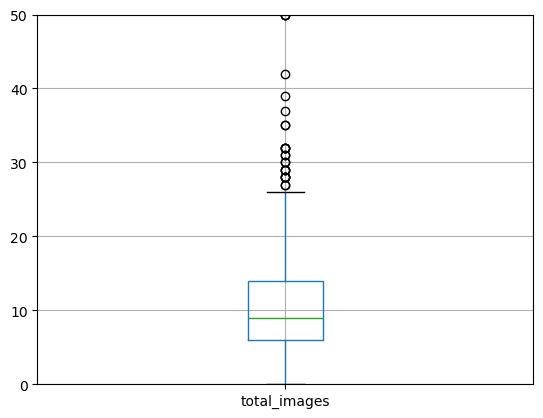

In [10]:
df.boxplot('total_images')
plt.ylim(0, 50)
plt.show()

In [11]:
# Более наглядно, в цифрах можем увидеть количество редких значении
df['total_images'].value_counts().sort_index()

total_images
0     1059
1      872
2      640
3      769
4      986
5     1301
6     1482
7     1521
8     1585
9     1725
10    1798
11    1362
12    1225
13    1015
14     986
15     948
16     761
17     650
18     642
19     603
20    1694
21      12
22       8
23      16
24       8
25       1
26       5
27       2
28       4
29       3
30       2
31       2
32       4
35       2
37       1
39       1
42       1
50       3
Name: count, dtype: int64

**Мы видим, что значения от 21 до 50 - сильно отклоняются от большинства значений в выборке. Поэтому обозначим эти значения как "редкие случаи", и удалим их.**

In [13]:
df.drop(df[df['total_images'] > 20].index, inplace=True)

#### 2.1.2. `total_area`

In [15]:
df['total_area'].describe()

count    23624.000000
mean        60.280347
std         35.602132
min         12.000000
25%         40.000000
50%         52.000000
75%         69.602500
max        900.000000
Name: total_area, dtype: float64

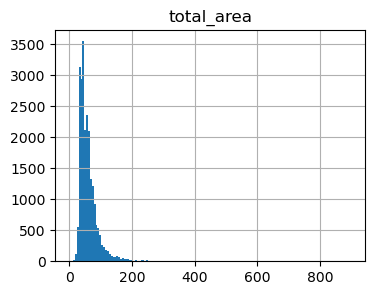

In [16]:
df.hist('total_area', bins=150, range=(0, 900), figsize=(4, 3))
plt.show()

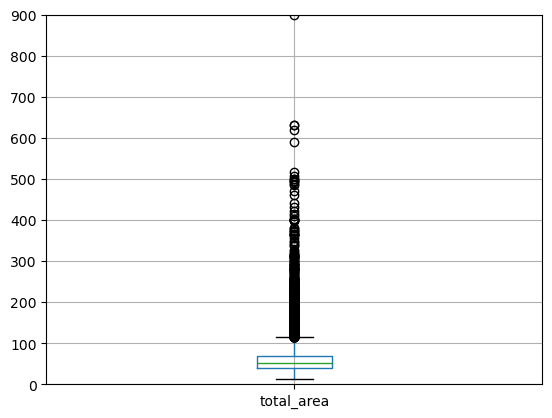

In [17]:
df.boxplot('total_area')
plt.ylim(0, 900)
plt.show()

В графике мы видим сильную концентрацию в пределах и за пределами максимального значения. Поэтому для удаления редких и выбивающихся значений из столбца total_area построим сводную таблицу по категориям площадей, что позволит четко увидеть распределение значений в разных диапазонах: 

In [19]:
# Определяем новые интервалы для площади, включая 600 как верхнюю границу
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600]
labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', 
          '60-100', '100-150', '150-200', '200-250', '250-300', '300-350', '350-400', '400-450', '450-500', '500-550', '550-600']

# Создаем новую колонку с группами по диапазонам
df['total_area_group'] = pd.cut(df['total_area'], bins=bins, labels=labels, right=False)

# Строим сводную таблицу по количеству значений в каждом интервале
grouped = df['total_area_group'].value_counts().sort_index()

# Выводим результат
print(grouped)


total_area_group
0-5           0
5-10          0
10-15         6
15-20        21
20-25       163
25-30       502
30-35      2565
35-40      2464
40-45      2953
45-50      2245
50-55      1926
55-60      1932
60-100     6954
100-150    1316
150-200     348
200-250     114
250-300      52
300-350      22
350-400      15
400-450      10
450-500       7
500-550       4
550-600       1
Name: count, dtype: int64


* Группы с площадями 0-5 м² и 5-10 м² содержат данные, которые могут быть аномальными. Эти значения могут быть ошибочными (например, в случае с кладовыми помещениями, очень маленькими комнатами или ошибками в данных). В реальной жизни такие площади крайне редки и не отражают типичные квартиры.

* Группы 10-15 м² и 15-20 м² тоже показывают малые площади, которые могут быть нехарактерными для большинства жилых объектов, особенно в городской среде. Хотя такие значения могут быть встречены (например, в случае с маленькими студиями), их всё равно стоит отнести к редким случаям, если они составляют значительную часть данных.

* Более крупные квартиры (площадь больше 150 м²) тоже могут быть исключены из анализа, так как такие объекты могут представлять собой редкие или элитные квартиры, которые также не типичны для общего рынка недвижимости.

**На основании вышеизложенного я решил исключить следующие группы данных:**
* Площади менее 20 м²: Такие значения считаются редкими и аномальными. Маленькие объекты часто либо не являются жилыми помещениями, либо сильно отличаются от стандартных квартир, и их присутствие может искажать статистику по ценам и другим характеристикам.
* Площади более 150 м²: Такие квартиры могут быть очень редкими и представлять собой элитную недвижимость, которая также не является репрезентативной для массового рынка жилья.

In [21]:
# Удаляем площади менее 20 м² и более 150 м²
df.drop(df[(df['total_area'] < 20) | (df['total_area'] > 150)].index, inplace=True)

#### 2.1.3. `rooms`

In [23]:
df['rooms'].describe()

count    23037.000000
mean         2.000868
std          0.949040
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64

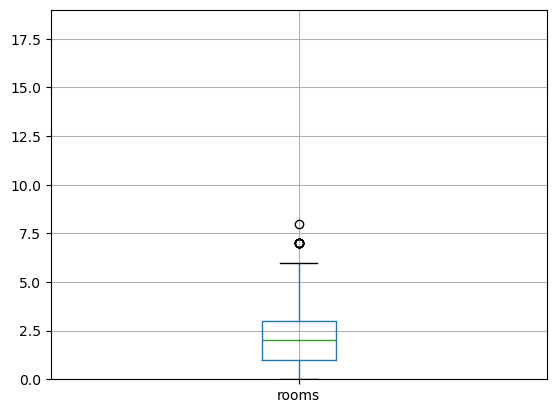

In [24]:
df.boxplot('rooms')
plt.ylim(0, 19)
plt.show()

In [25]:
df['rooms'].value_counts().sort_index()

rooms
0     187
1    8013
2    7913
3    5694
4    1020
5     177
6      24
7       8
8       1
Name: count, dtype: int64

* Для столбца rooms видно, что значения, такие как 0, 14, 15, 16, 19 — сильно отклоняются от большинства данных, и их количество очень низкое, что делает их редкими или выбивающимися.

* 0 комнат — это, скорее всего, ошибка данных (например, если квартира является студией, то количество комнат может быть записано как 0, что не имеет смысла).
* Значения 14-19 комнат — это крайне редкие и аномальные данные, которые не соответствуют обычной распределенности для жилых помещений. Например, квартира с 14 комнатами — это исключительный случай, который можно считать выбросом.

**Решение:**
Удалим 0 (ошибочные значения) и все значения больше 10 комнат как редкие и выбивающиеся.

In [27]:
df.drop(df[(df['rooms'] == 0) | (df['rooms'] > 10)].index, inplace=True)

#### 2.1.4. `ceiling_height`

In [29]:
df['ceiling_height'].describe()

count    14011.000000
mean         2.756265
std          1.261274
min          1.000000
25%          2.500000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

* В столбце ceiling_height видно, что минимальное значение — 1.0 м, а максимальное значение — 100 м, что явно указывает на наличие выбросов

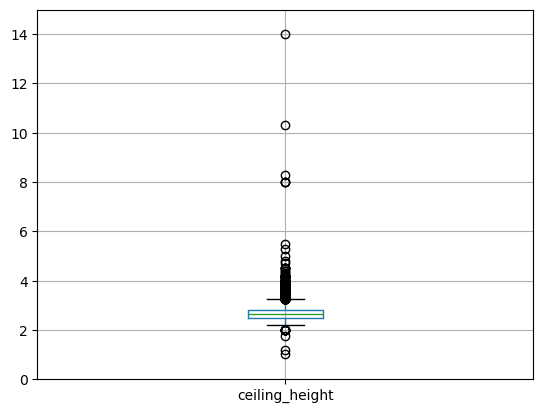

In [31]:
df.boxplot('ceiling_height')
plt.ylim(0, 15)
plt.show()

* 1.0 м — это очевидная ошибка данных, так как высота потолков в обычных квартирах не может быть такой низкой.
* 100 м — также явно является ошибкой или выбросом, так как это экстраординарное значение, которое никак не может соответствовать реальной высоте потолков.

**Решение:**
* **Удалим значения, которые меньше 2.0 м (например, это могут быть ошибки при вводе данных) и больше 6.0 м (потому что такие значения для высоты потолков крайне редки).**

* Почему такой диапазон:
Высота потолков в жилых помещениях обычно варьируется от 2.5 м до 4 м. Если высота больше 6 м — это скорее всего либо ошибка данных, либо очень редкие случаи, такие как квартиры с высокими потолками, которые можно оставить для дальнейшего анализа, но не использовать в общей выборке.

In [33]:
df.drop(df[(df['ceiling_height'] < 2) | (df['ceiling_height'] > 6)].index, inplace=True)

## 2.2. Пропущенные значения

In [35]:
pd.isnull(df).sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           8839
floors_total               82
living_area              1814
floor                       0
is_apartment            20126
studio                      0
open_plan                   0
kitchen_area             1994
balcony                 11087
locality_name               0
airports_nearest         5416
cityCenters_nearest      5396
parks_around3000         5395
parks_nearest           15180
ponds_around3000         5395
ponds_nearest           14216
days_exposition          3016
category                    0
total_area_group            0
dtype: int64

1. `ceiling_height` **(высота потолков)**:
- <span style="color:orange"> **Причина:** </span> Пропуски могут быть результатом невнимательности пользователя.
- <span style="color:green"> **Решение:** </span> Заменить пропуски медианой, так как высота потолков стандартна для большинства квартир.
- <span style="color:blue"> **Аргумент:** </span> Для построения моделей или вычисления метрик лучше иметь заполненные значения, особенно если их доля значительна.
2. `floors_total` **(всего этажей)**:
- <span style="color:orange"> **Причина:** </span> Пропуски вероятно связаны с ошибками ввода.
- <span style="color:green"> **Решение:** </span> Заменить медианой.
- <span style="color:blue"> **Аргумент:** </span> Число этажей — важный фактор в анализе, особенно для оценки востребованности жилья.
3. `living_area` **(жилая площадь)**:
- <span style="color:orange"> **Причина:** </span> Пропуски могут быть из-за отсутствия данных от пользователя или технических ошибок.
- <span style="color:green"> **Решение:** </span> Заменить медианой.
- <span style="color:blue"> **Аргумент:** </span> Это важный параметр для оценки цены, и отсутствие значений может повлиять на модель.
4. `is_apartment` **(апартаменты)**:
- <span style="color:orange"> **Причина:** </span> Пропуски означают, что это не апартаменты.
- <span style="color:green"> **Решение:** </span> Заменить на False.
- <span style="color:blue"> **Аргумент:** </span> Апартаменты встречаются редко, поэтому такое предположение логично.
5. `kitchen_area` **(площадь кухни)**:
- <span style="color:orange"> **Причина:** </span> Аналогично `living_area`.
- <span style="color:green"> **Решение:** </span> Заменить медианой.
- <span style="color:blue"> **Аргумент:** </span> Площадь кухни важна для анализа, и медиана минимизирует искажения.
6. `balcony` **(число балконов)**:
- <span style="color:orange"> **Причина:** </span> Пропуски означают, что балкона нет.
- <span style="color:green"> **Решение:** </span> Заменить на 0.
- <span style="color:blue"> **Аргумент:** </span> Это стандартное решение, которое не искажает аналитические выводы.
7. `airports_nearest` **(расстояние до аэропорта)**, `parks_nearest` **(расстояние до парка)**, `ponds_nearest` **(расстояние до водоёма)**:
- <span style="color:orange"> **Причина:** </span> Пропуски означают отсутствие объекта поблизости или отсутствие данных.
- <span style="color:green"> **Решение:** </span> Оставить пропуски.
- <span style="color:blue"> **Аргумент:** </span> Эти данные важны сами по себе; отсутствие значения сигнализирует о удаленности.
8. `parks_around3000` **(число парков в радиусе 3 км)**, `ponds_around3000` **(число водоёмов в радиусе 3 км)**:
- <span style="color:orange"> **Причина:** </span> Пропуски означают отсутствие парков/водоемов в радиусе.
- <span style="color:green"> **Решение:** </span> Заменить на 0.
- <span style="color:blue"> **Аргумент:** </span> Это не искажает аналитику, а указывает на отсутствие таких объектов.
9. `days_exposition` **(время размещения объявления)**:
- <span style="color:orange"> **Причина:** </span> Пропуски могут означать, что объявление еще активно.
- <span style="color:green"> **Решение:** </span> Оставить как есть.
- <span style="color:blue"> **Аргумент:** </span> Незаполненные значения не мешают анализу времени продаж.

10. `cityCenters_nearest` **(расстояние до центра города)**:
- <span style="color:orange"> **Причина:** </span> Пропуски могут быть вызваны отсутствием координат квартиры в данных или техническими ошибками в процессе их обработки. Проблема может быть более характерна для объектов, находящихся за пределами основных населённых пунктов, где определение центра может быть неочевидным.
- <span style="color:green"> **Решение:** </span> Оставить пропуски как есть.
- <span style="color:blue"> **Аргумент:** </span> Пропуски в этом параметре сами по себе несут ценную информацию — отсутствие данных может указывать на удалённость объекта от центра. Искусственное заполнение значениями, такими как медиана или среднее, может исказить выводы и ухудшить качество анализа.

**Итоговые решения:**
- **Заполнить медианой:** `ceiling_height`, `living_area`, `kitchen_area`, `floors_total`.
- **Заполнить 0:** `balcony`, `parks_around3000`, `ponds_around3000`.
- **Заполнить False:** `is_apartment`.
- **Оставить пустыми:** `airports_nearest`, `parks_nearest`, `ponds_nearest`, `days_exposition`, `cityCenters_nearest`.

In [37]:
# 1. Заполнение медианой для числовых столбцов
columns_to_fill_median = ['ceiling_height', 'living_area', 'kitchen_area', 'floors_total']
for col in columns_to_fill_median:
    df[col] = df[col].fillna(df[col].median())

# 2. Заполнение нулями для балконов, парков и водоемов в радиусе
columns_to_fill_zero = ['balcony', 'parks_around3000', 'ponds_around3000']
for col in columns_to_fill_zero:
    df[col] = df[col].fillna(0)

# 3. Заполнение логическим значением для апартаментов
df['is_apartment'] = df['is_apartment'].fillna(False)

# 4. Проверка пропусков в итоговой таблице
df.isnull().sum()

/var/folders/yp/b72kthpx7qg132968npq_nk00000gn/T/ipykernel_45156/1149160232.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['is_apartment'] = df['is_apartment'].fillna(False)


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5416
cityCenters_nearest      5396
parks_around3000            0
parks_nearest           15180
ponds_around3000            0
ponds_nearest           14216
days_exposition          3016
category                    0
total_area_group            0
dtype: int64

## 2.3. Приведение данных к нужным типам

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22819 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   total_images          22819 non-null  int64   
 1   last_price            22819 non-null  float64 
 2   total_area            22819 non-null  float64 
 3   first_day_exposition  22819 non-null  object  
 4   rooms                 22819 non-null  int64   
 5   ceiling_height        22819 non-null  float64 
 6   floors_total          22819 non-null  float64 
 7   living_area           22819 non-null  float64 
 8   floor                 22819 non-null  int64   
 9   is_apartment          22819 non-null  bool    
 10  studio                22819 non-null  bool    
 11  open_plan             22819 non-null  bool    
 12  kitchen_area          22819 non-null  float64 
 13  balcony               22819 non-null  float64 
 14  locality_name         22819 non-null  object  
 15  airport

1. `first_day_exposition`
- <span style="color:green"> **Изменение:** </span> object -> datetime
- <span style="color:orange"> **Причина:** </span> Работа с датами

2. `floors_total`, `balcony`, `parks_around3000`, `ponds_around3000`, `days_exposition`
- <span style="color:green"> **Изменение:** </span> float -> int
- <span style="color:orange"> **Причина:** </span> Количества этажей, балконов, парков, водоемов, дней соответственно

3. `cityCenters_nearest`, `airports_nearest`, `parks_nearest`, `ponds_nearest`
- <span style="color:green"> **Изменение:** </span> float -> int
- <span style="color:orange"> **Причина:** </span> Расстояния в метрах


**Мы используем Int64, потому что:**
- Это безопасный выбор для данных с пропусками.
- Это защищает от переполнения и поддерживает масштабируемость.
- В контексте аналитики, где пропуски — важный сигнал, Int64 предпочтительнее.

In [42]:
# Преобразование даты
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

# Список столбцов для преобразования float64 -> Int64
int_columns = [
    'floors_total', 'balcony', 'parks_around3000', 'ponds_around3000', 
    'days_exposition', 'cityCenters_nearest', 'airports_nearest', 
    'parks_nearest', 'ponds_nearest'
]

# Округление и преобразование в целочисленный тип
for col in int_columns:
    # Округляем значения и преобразуем в целочисленный тип
    df[col] = df[col].apply(lambda x: round(x) if pd.notnull(x) else x).astype('Int64')

# Проверка типов данных после преобразования
print(df['first_day_exposition'].dtypes)
print(df[int_columns].dtypes)

datetime64[ns]
floors_total           Int64
balcony                Int64
parks_around3000       Int64
ponds_around3000       Int64
days_exposition        Int64
cityCenters_nearest    Int64
airports_nearest       Int64
parks_nearest          Int64
ponds_nearest          Int64
dtype: object


**Если в столбцах, таких как days_exposition, присутствуют дробные значения, их можно округлить перед преобразованием в целые числа. Это также решает проблему с очень маленькими остаточными значениями, которые возникают из-за операций с плавающей запятой.**

#### Устанавливаем формат отображения чисел с плавающей точкой
pd.set_option('display.float_format', '{:.15f}'.format)
df

Важное замечание:
После изменения этого параметра все числовые значения в DataFrame будут отображаться с заданной точностью. Если вы хотите вернуться к стандартному виду (с округлением), вы можете сбросить параметр с помощью:

python
Копировать код
pd.reset_option('display.float_format')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22819 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22819 non-null  int64         
 1   last_price            22819 non-null  float64       
 2   total_area            22819 non-null  float64       
 3   first_day_exposition  22819 non-null  datetime64[ns]
 4   rooms                 22819 non-null  int64         
 5   ceiling_height        22819 non-null  float64       
 6   floors_total          22819 non-null  Int64         
 7   living_area           22819 non-null  float64       
 8   floor                 22819 non-null  int64         
 9   is_apartment          22819 non-null  bool          
 10  studio                22819 non-null  bool          
 11  open_plan             22819 non-null  bool          
 12  kitchen_area          22819 non-null  float64       
 13  balcony              

# Шаг 3. Расчитываем и добавляем в таблицу:

### 3.1. Цена квадратного метра

In [48]:
df['price_per_sqm'] = (df['last_price'] / df['total_area']).round(2)

### 3.2. День недели, месяц и год публикации объявления

In [50]:
df['publication_weekday'] = df['first_day_exposition'].dt.day_name()  # День недели
df['publication_month'] = df['first_day_exposition'].dt.month         # Месяц
df['publication_year'] = df['first_day_exposition'].dt.year           # Год

### 3.3. Категоризация этажей квартир (первый, последний, другой)

In [52]:
def categorize_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

df['floor_category'] = df.apply(categorize_floor, axis=1)

### 3.4. Соотношение жилой и общей площади, а также отношение площади кухни к общей

In [54]:
# Соотношение жилой и общей площади
df['living_to_total_area_ratio'] = (df['living_area'] / df['total_area']).round(2)

# Отношение площади кухни к общей площади
df['kitchen_to_total_area_ratio'] = (df['kitchen_area'] / df['total_area']).round(2)

In [55]:
# Проверим добавленные столбцы
df[['price_per_sqm', 'publication_weekday', 'publication_month', 'publication_year', 
          'floor_category', 'living_to_total_area_ratio', 'kitchen_to_total_area_ratio']].head()

,price_per_sqm,publication_weekday,publication_month,publication_year,floor_category,living_to_total_area_ratio,kitchen_to_total_area_ratio
0,361111.11,Thursday,3,2019,другой,0.47,0.23
1,248762.38,Tuesday,12,2018,первый,0.46,0.27
2,278357.14,Thursday,8,2015,другой,0.61,0.15
4,300000.00,Tuesday,6,2018,другой,0.32,0.41
5,285197.37,Monday,9,2018,другой,0.47,0.30


In [56]:
# Текущий датафрейм
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,category,total_area_group,price_per_sqm,publication_weekday,publication_month,publication_year,floor_category,living_to_total_area_ratio,kitchen_to_total_area_ratio
0,20,39000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,<NA>,Город,100-150,361111.11,Thursday,3,2019,другой,0.47,0.23
1,7,10050000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,81,Посёлок,40-45,248762.38,Tuesday,12,2018,первый,0.46,0.27
2,10,15588000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,558,Город,55-60,278357.14,Thursday,8,2015,другой,0.61,0.15
4,2,30000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,121,Город,100-150,300000.00,Tuesday,6,2018,другой,0.32,0.41
5,10,8670000.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,55,Посёлок,30-35,285197.37,Monday,9,2018,другой,0.47,0.30


# Шаг 4. Исследовательский анализ данных

## 4.1. Площадь, цена, число комнат, высота потолков

In [59]:
# Переводим цену в миллионы для удобства визуализации
df['last_price_millions'] = df['last_price'] / 1000000
df['last_price_millions'] = df['last_price_millions'].round(2)

In [60]:
df[['last_price_millions', 'total_area', 'rooms', 'ceiling_height']].describe()

,last_price_millions,total_area,rooms,ceiling_height
count,22819.000000,22819.000000,22819.000000,22819.000000
mean,17.144219,56.785151,2.017398,2.687792
std,13.594177,22.828908,0.935610,0.202704
min,0.040000,20.000000,1.000000,2.000000
25%,10.200000,40.000000,1.000000,2.600000
50%,13.800000,51.400000,2.000000,2.650000
75%,19.650000,67.910000,3.000000,2.700000
max,372.000000,150.000000,8.000000,5.500000


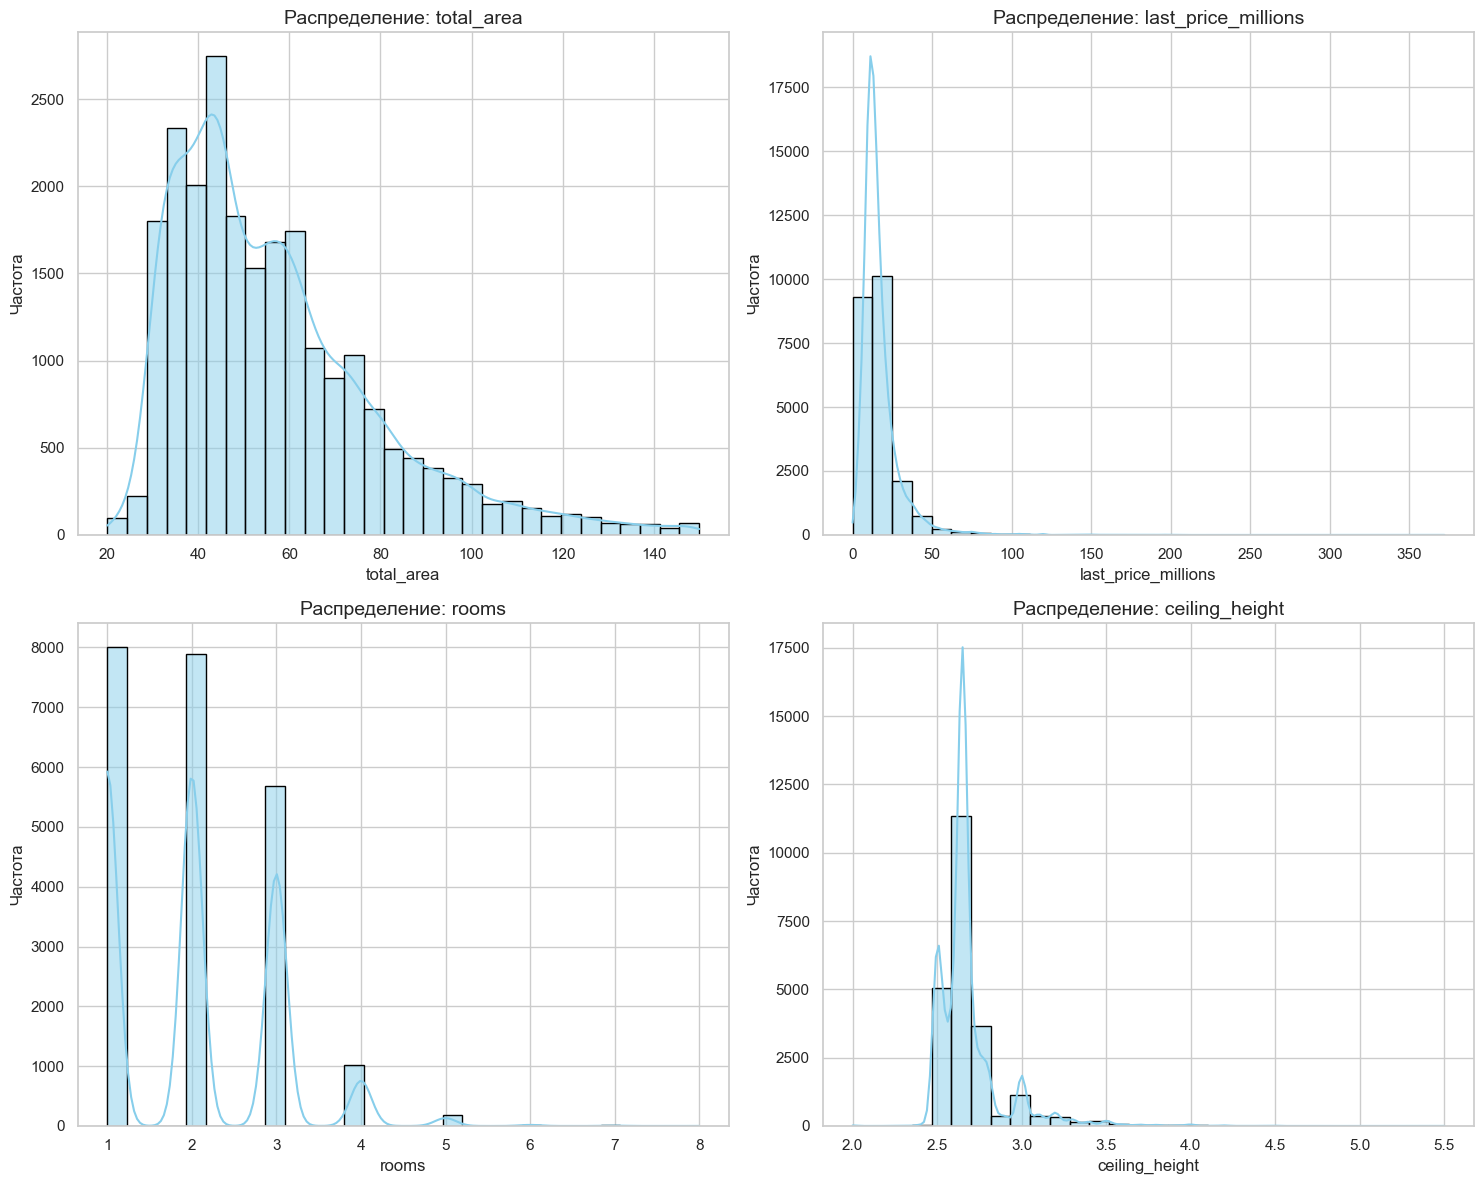

In [61]:
# Список столбцов для построения гистограмм
columns = ['total_area', 'last_price_millions', 'rooms', 'ceiling_height']

# Настройка стиля seaborn для улучшенного отображения
sns.set(style="whitegrid")

# Создаем фигуру и оси для гистограмм
plt.figure(figsize=(15, 12))

# Строим гистограмму для каждого столбца
for i, col in enumerate(columns, 1):
    plt.subplot(2, 2, i)  # 2 строки и 2 столбца
    sns.histplot(df[col], kde=True, color='skyblue', bins=30, edgecolor='black')
    plt.title(f'Распределение: {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Частота', fontsize=12)

# Настройка общих параметров для всей фигуры
plt.tight_layout()
plt.show()

**Выводы:**
* **Площадь(total_area):** Большинство квартир имеют площадь примерно от 40 до 70 м².
* **Цена квартир(last_price):** Распределение цен показывает, что большинство квартир стоят в диапазоне примерно от 10 до 20 миллионов тг.
* **Число комнат (rooms):** Наибольшее количество квартир имеют 1–3 комнаты, что характерно для среднестатистического жилья. Квартиры с 4 и более комнатами встречаются реже.
* **Высота потолков (ceiling_height):** Стандартная высота потолков для большинства квартир составляет 2.6–2.7 м.

## 4.2. Анализ времени продажи квартир

#### 4.2.1. Визуализация распределения времени продажи

Сначала построим гистограмму, чтобы увидеть распределение времени продажи квартир. Используем гистограмму с ядровой плотностью (KDE), чтобы понять, как часто встречаются различные значения времени продажи.

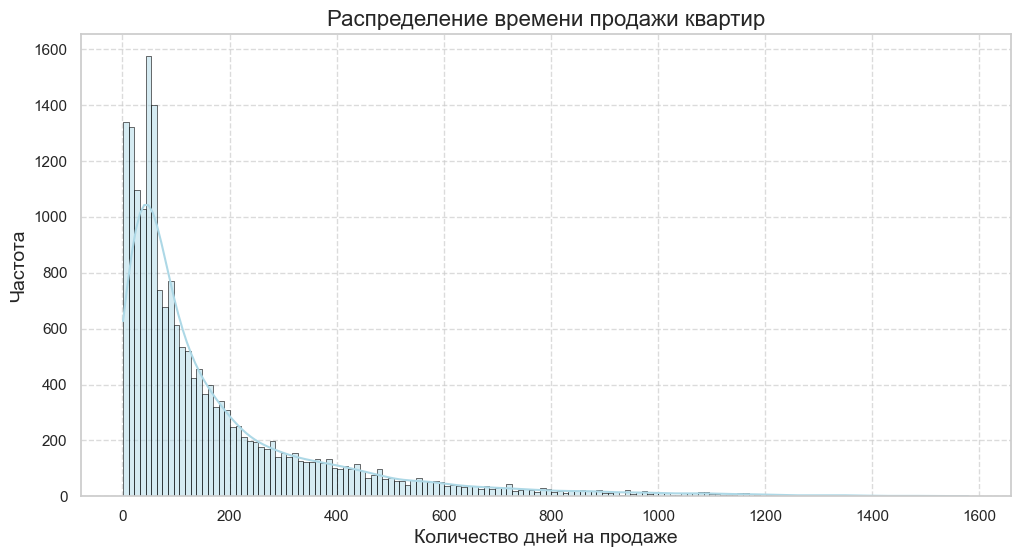

In [66]:
# Гистограмма времени продажи
plt.figure(figsize=(12, 6))
sns.histplot(df['days_exposition'], kde=True, bins=150, color='lightblue', edgecolor='black')
plt.title('Распределение времени продажи квартир', fontsize=16)
plt.xlabel('Количество дней на продаже', fontsize=14)
plt.ylabel('Частота', fontsize=14)

# Добавим сетку для улучшения восприятия
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

#### 4.2.2. Основные статистики по времени продажи

Чтобы лучше понять, сколько времени в среднем занимает продажа квартиры, рассчитаем основные статистики по столбцу days_exposition:

In [69]:
# Рассчитаем среднее и медиану
mean_days = df['days_exposition'].mean()
median_days = df['days_exposition'].median()

# Выведем результаты
print(f"Среднее: {mean_days:.2f}")
print(f"Медиана: {median_days}")

Среднее: 179.20
Медиана: 95.0


Среднее количество дней на продаже: 179.20 дней (~6 месяцев).
Медианное количество дней на продаже: 95 дней (половина квартир продается за 3 месяца).

#### 4.2.3. Создание интервалов времени продажи

Для более детального анализа разобьем время продажи на интервалы. Мы будем использовать следующие интервалы времени (в днях):

In [73]:
# Создание интервалов для времени продажи
bins = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 360, 480, 600, 1000, 1580]
labels = ['0-30', '31-60', '61-90', '91-120', '121-150', '151-180', '181-210', '211-240', '241-270', '271-300',
          '301-360', '361-480', '481-600', '601-1000', '1000+']

df['days_exposition_interval'] = pd.cut(df['days_exposition'], bins=bins, labels=labels, right=False)

Теперь создадим сводную таблицу, которая покажет количество квартир в каждом интервале времени и их процент от общего числа.

In [75]:
# Сводная таблица с количеством и процентами
distribution_table = pd.crosstab(df['days_exposition_interval'], columns='count')

# Добавление процента
distribution_table['percentage'] = (distribution_table['count'] / len(df)) * 100

# Переименуем столбцы
distribution_table = distribution_table.reset_index()
distribution_table.columns = ['Интервал (дни)', 'Количество квартир', 'Процент от общего числа (%)']

# Выведем сводную таблицу
distribution_table

,Интервал (дни),Количество квартир,Процент от общего числа (%)
0,0-30,3410,14.943687
1,31-60,3460,15.162803
2,61-90,2568,11.253780
3,91-120,1830,8.019633
4,121-150,1259,5.517332
5,151-180,1051,4.605811
6,181-210,839,3.676761
7,211-240,658,2.883562
8,241-270,508,2.226215
9,271-300,482,2.112275


#### 4.2.4. Визуализация распределения количества и процента квартир по интервалам

Для лучшего восприятия добавим графики для визуализации данных.

/var/folders/yp/b72kthpx7qg132968npq_nk00000gn/T/ipykernel_45156/2046854033.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Интервал (дни)', y='Количество квартир', data=distribution_table, palette='Blues_d')


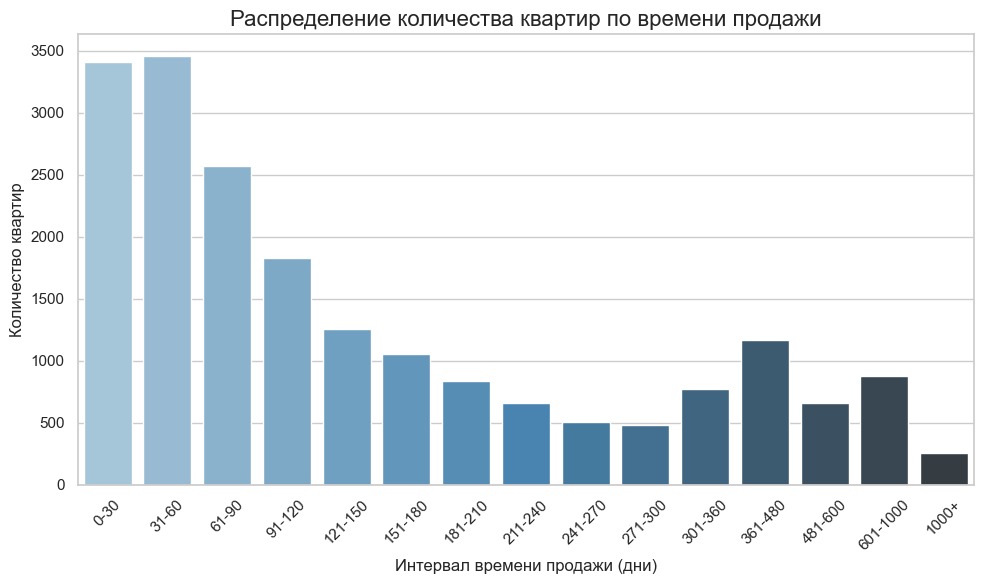

/var/folders/yp/b72kthpx7qg132968npq_nk00000gn/T/ipykernel_45156/2046854033.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Интервал (дни)', y='Процент от общего числа (%)', data=distribution_table, palette='Blues_d')


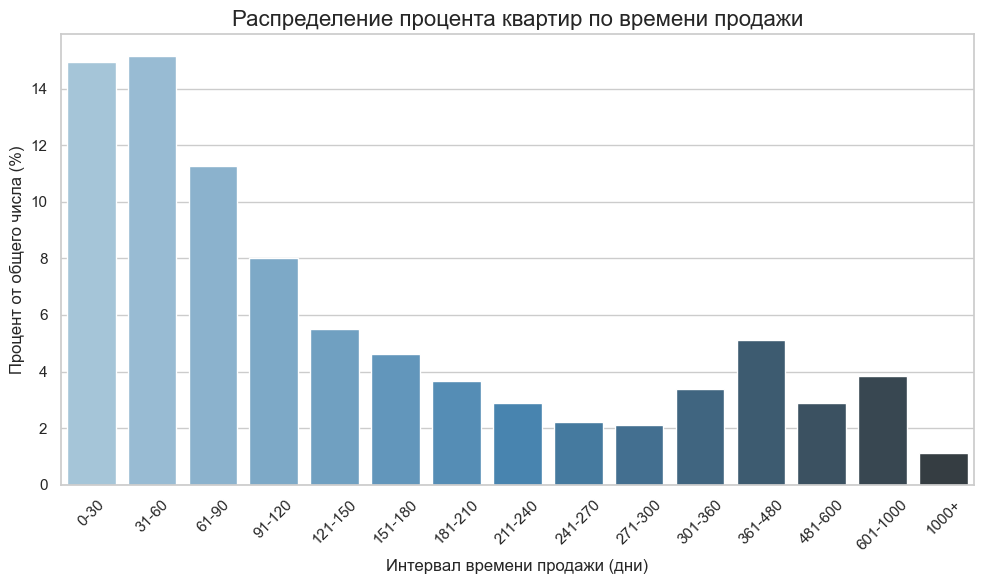

In [78]:
# Визуализация количества квартир по интервалам
plt.figure(figsize=(10, 6))
sns.barplot(x='Интервал (дни)', y='Количество квартир', data=distribution_table, palette='Blues_d')

plt.title('Распределение количества квартир по времени продажи', fontsize=16)
plt.xlabel('Интервал времени продажи (дни)', fontsize=12)
plt.ylabel('Количество квартир', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Визуализация процента квартир по интервалам
plt.figure(figsize=(10, 6))
sns.barplot(x='Интервал (дни)', y='Процент от общего числа (%)', data=distribution_table, palette='Blues_d')

plt.title('Распределение процента квартир по времени продажи', fontsize=16)
plt.xlabel('Интервал времени продажи (дни)', fontsize=12)
plt.ylabel('Процент от общего числа (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 4.2.5. Выводы

С учетом описательной статистики и кросс-таблицы по интервалам времени продажи, можно сделать следующие выводы:

**1. Что обычно занимает продажа квартиры?**
- Среднее время продажи: 180.89 дня (~6 месяцев).
- Медиана: 95 дней. Это означает, что половина квартир продается за первые 3 месяца, что является относительно быстрым сроком.

Из таблицы по интервалам видно, что:
- 43.4% квартир продаются за 0-90 дней (до 3 месяцев).
- 15.8% квартир продаются очень быстро, за менее 30 дней.

**2. Когда можно считать, что продажа прошла очень быстро?**
- Очень быстро: менее 30 дней (15.8% квартир).
- Быстро: до 3 месяцев (0-90 дней) — около 43.4% квартир.

Такие продажи могут происходить при конкурентоспособной цене, хорошем расположении квартиры или активной маркетинговой кампании.

**3. Когда продажа считается необычно долгой?**
- Долгая продажа: более 6 месяцев.
  - Интервалы 151-180 дней и более — 15% квартир.
- Продажа, которая занимает более 1 года (например, 301-360 дней и более), считается аномально долгой.

## 4.3. Факторы, которые влияют на стоимость квартиры

### 4.3.1. Зависимость цены от площади, числа комнат, удалённости от центра и типа этажа

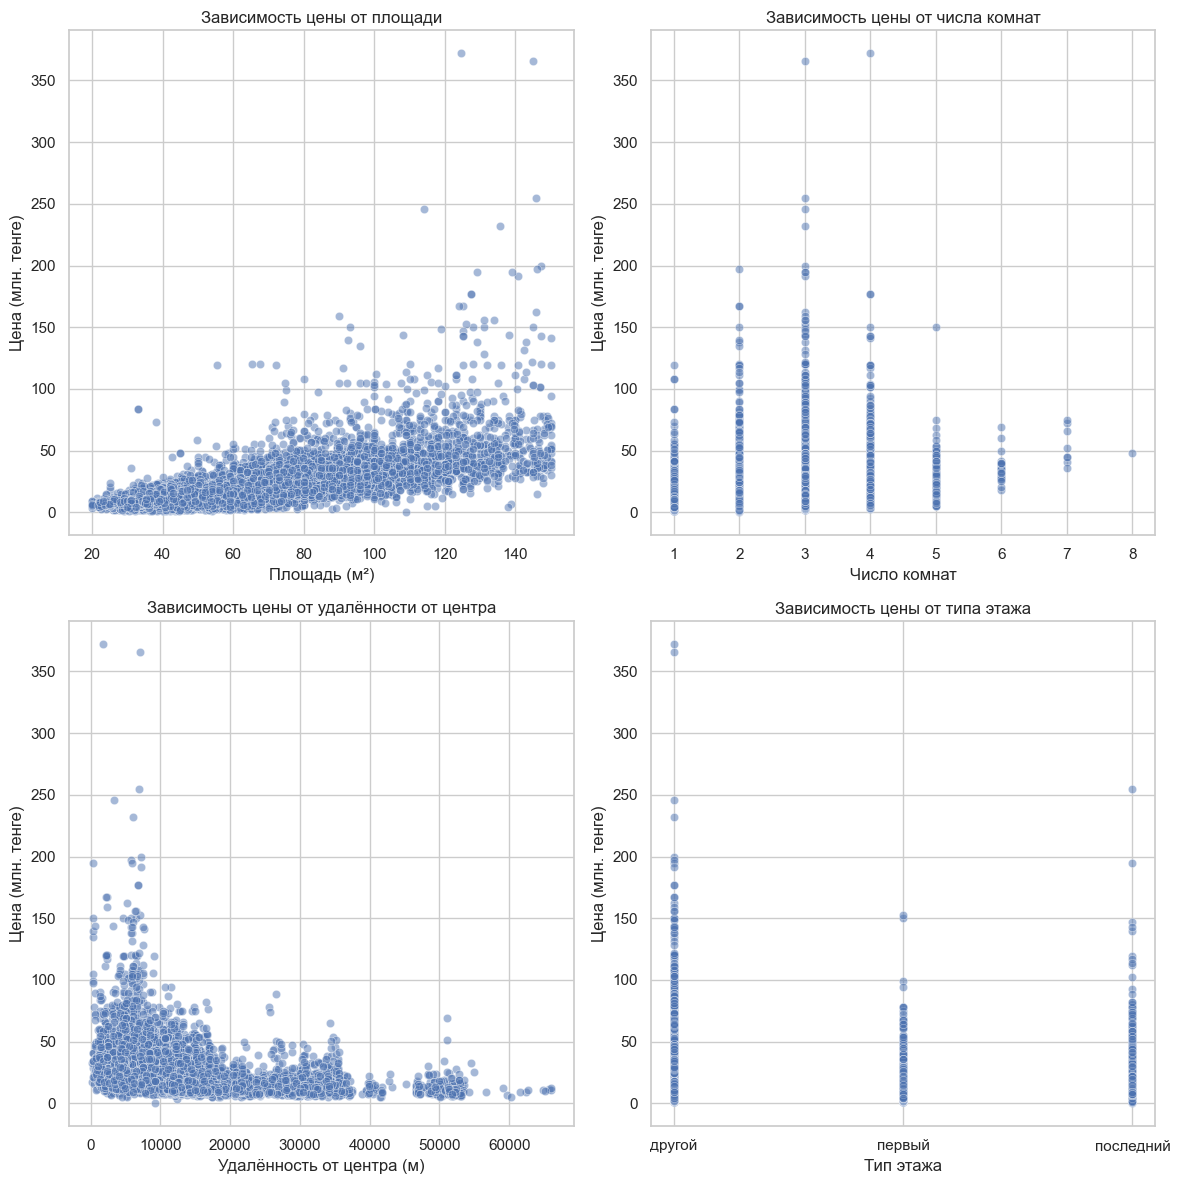

In [83]:
# Создаём фигуру с четырьмя подграфиками (2 строки, 2 столбца)
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Зависимость цены от площади
sns.scatterplot(x='total_area', y='last_price_millions', data=df, ax=axes[0, 0], alpha=0.5)
axes[0, 0].set_title('Зависимость цены от площади')
axes[0, 0].set_xlabel('Площадь (м²)')
axes[0, 0].set_ylabel('Цена (млн. тенге)')

# Зависимость цены от числа комнат
sns.scatterplot(x='rooms', y='last_price_millions', data=df, ax=axes[0, 1], alpha=0.5)
axes[0, 1].set_title('Зависимость цены от числа комнат')
axes[0, 1].set_xlabel('Число комнат')
axes[0, 1].set_ylabel('Цена (млн. тенге)')

# Зависимость цены от удалённости от центра
sns.scatterplot(x='cityCenters_nearest', y='last_price_millions', data=df, ax=axes[1, 0], alpha=0.5)
axes[1, 0].set_title('Зависимость цены от удалённости от центра')
axes[1, 0].set_xlabel('Удалённость от центра (м)')
axes[1, 0].set_ylabel('Цена (млн. тенге)')

# Зависимость цены от типа этажа (scatter plot)
sns.scatterplot(x='floor_category', y='last_price_millions', data=df, ax=axes[1, 1], alpha=0.5)
axes[1, 1].set_title('Зависимость цены от типа этажа')
axes[1, 1].set_xlabel('Тип этажа')
axes[1, 1].set_ylabel('Цена (млн. тенге)')

# Отображаем все графики
plt.tight_layout()  # Для корректного расположения графиков
plt.show()


**Общие выводы:**
* Площадь и количество комнат имеют явное влияние на цену — чем больше площадь и количество комнат, тем выше цена.
* Удалённость от центра играет большую роль в установлении цены, однако это также может зависеть от уникальности местоположения.
* Тип этажа также влияет на цену, но в меньшей степени — квартиры на первых этажах стоят дешевле, чем на других этажах, а последние этажи часто оказываются дороже.

### 4.3.2. Зависимость от даты размещения: дня недели, месяца и года.

#### Зависимость цены от дня недели

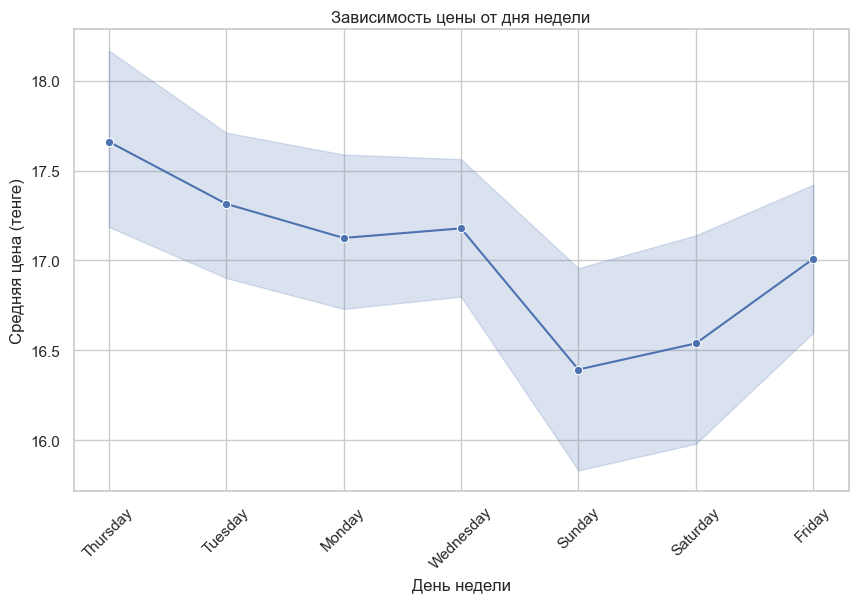

In [87]:
# Линейный график для зависимости цены от дня недели
plt.figure(figsize=(10, 6))
sns.lineplot(x='publication_weekday', y='last_price_millions', data=df, marker='o')
plt.title('Зависимость цены от дня недели')
plt.xlabel('День недели')
plt.ylabel('Средняя цена (тенге)')
plt.xticks(rotation=45)  # Поворот меток на оси X
plt.show()

In [88]:
df.groupby('publication_weekday')['last_price_millions'].agg(['mean', 'median', 'count']).sort_values(by='mean')

,mean,median,count
publication_weekday,,,
Sunday,16.392924,13.50,1638
Saturday,16.538355,13.50,1872
Friday,17.009548,13.65,3849
Monday,17.125472,13.80,3494
Wednesday,17.178793,13.95,3819
Tuesday,17.315407,14.10,4039
Thursday,17.661548,13.78,4108


* Самые высокие цены наблюдаются в четверг и вторник, где средняя цена за квартиру составляет примерно 17.6 и 17.3 млн тенге соответственно.
* В понедельник и среду цены также относительно высоки, чуть выше 17 млн тенге.
* Самые низкие цены зафиксированы в воскресенье и субботу (около 16.4 млн тенге), что может свидетельствовать о снижении спроса в выходные дни.

**Вывод: Цены на квартиры в течение недели имеют незначительные колебания, с тенденцией к увеличению в начале недели и снижением в выходные. Это может быть связано с особенностями рыночной активности и возможными скидками в выходные дни.**

#### Зависимость цены от месяца

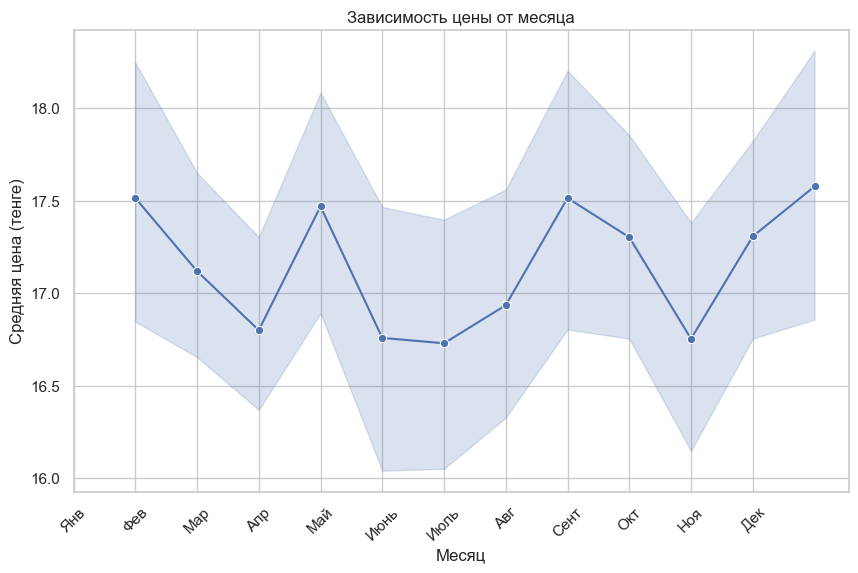

In [91]:
# Линейный график для зависимости цены от месяца
plt.figure(figsize=(10, 6))
sns.lineplot(x='publication_month', y='last_price_millions', data=df, marker='o')
plt.title('Зависимость цены от месяца')
plt.xlabel('Месяц')
plt.ylabel('Средняя цена (тенге)')
plt.xticks(ticks=range(12), labels=['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июнь', 'Июль', 'Авг', 'Сент', 'Окт', 'Ноя', 'Дек'], rotation=45)
plt.show()

In [92]:
df.groupby('publication_month')['last_price_millions'].agg(['mean', 'median', 'count']).sort_values(by='mean')

,mean,median,count
publication_month,,,
6,16.729130,13.11,1713
10,16.753519,13.59,2052
5,16.758230,13.50,1226
3,16.799820,13.80,2503
7,16.934920,13.80,1620
2,17.119244,13.80,2541
9,17.301862,13.95,1901
11,17.306739,13.95,2254
4,17.468518,14.25,2315


* Самые высокие цены наблюдаются в декабре и январе (около 17.5 млн тенге), что может быть связано с высоким спросом в зимние месяцы, когда люди предпочитают покупать квартиры перед новыми годами.
* В сентябре и августе наблюдается рост средней цены до 17.5 млн тенге, что может указывать на повышение спроса после летних месяцев.
* Самые низкие цены зафиксированы в январе, но разница не слишком велика по сравнению с другими месяцами.

**Вывод: На рынок недвижимости влияют сезонные колебания, причем весной и летом (май, июнь) наблюдается пик активности, а в конце года (ноябрь, декабрь) цены увеличиваются.**

#### Зависимость цены от месяца

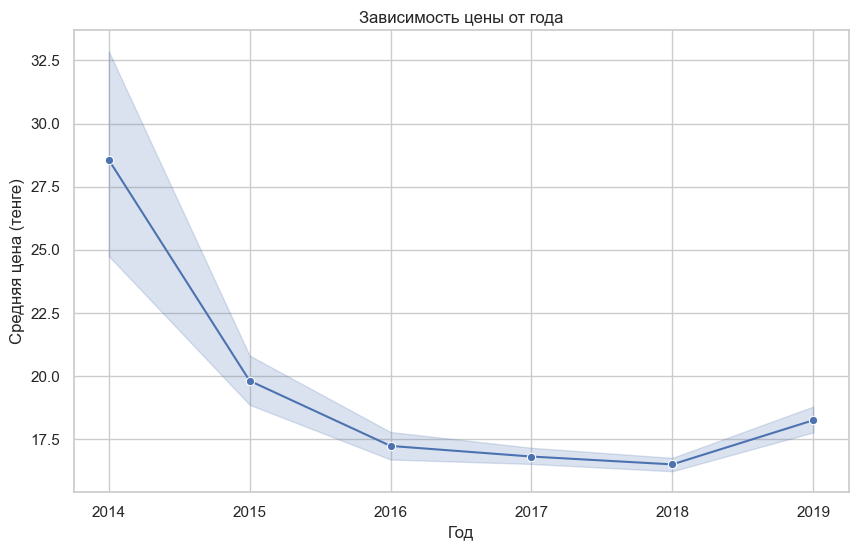

In [95]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='publication_year', y='last_price_millions', data=df, estimator='mean', marker='o', color='b')
plt.title('Зависимость цены от года')
plt.xlabel('Год')
plt.ylabel('Средняя цена (тенге)')
plt.show()

In [96]:
df.groupby('publication_year')['last_price_millions'].agg(['mean', 'median', 'count']).sort_values(by='mean')

,mean,median,count
publication_year,,,
2018,16.510012,13.65,8277
2017,16.820150,13.47,7810
2016,17.239918,13.35,2692
2019,18.256494,15.00,2795
2015,19.818528,15.55,1121
2014,28.563468,21.55,124


* В 2019 году наблюдается заметное увеличение цен, с ростом средней цены до 18.25 млн тенге. Это может быть связано с экономическими факторами, ростом спроса или улучшением макроэкономической ситуации.
* 2018 и 2017 годы показывают относительно стабильные и немного более низкие цены (16.5-16.7 млн тенге).
* В 2014 году была зафиксирована самая высокая цена (28.56 млн тенге), но это связано с небольшим количеством сделок (лишь 124 записи), что могло привести к аномально высокому значению.

**Вывод: Рынок недвижимости в последние годы показывает устойчивый рост цен, особенно в 2019 году, что может быть связано с улучшением экономической ситуации и повышением покупательской способности.**

#### Общие выводы

1. **День недели:** Цены на квартиры немного повышаются в начале недели (вторник, четверг) и снижаются в выходные (воскресенье, суббота). Это может быть связано с рыночными трендами и активностью покупателей.
2. **Месяц:** Сезонные колебания цен очевидны, с ростом цен в конце года (декабрь) и летом (май-июнь). Повышенный спрос в эти месяцы может быть вызван как сезонными факторами, так и праздниками.
3. **Год:** Рынок недвижимости показал рост цен в 2019 году, что могло быть связано с экономическими условиями, в то время как в 2018-2017 годах цены были стабильными и умеренными. В 2014 году наблюдаются выбросы, что связано с малым количеством сделок.

### 4.3.3. 10 населённых пунктов с наибольшим числом объявлений

In [101]:
# Шаг 1: Посчитаем количество объявлений для каждого населённого пункта
locality_counts = df['locality_name'].value_counts()

# Выберем 10 населённых пунктов с наибольшим числом объявлений
top_10_localities = locality_counts.head(10).index

# Шаг 2: Фильтруем датафрейм для этих 10 населённых пунктов
top_10_localities_data = df[df['locality_name'].isin(top_10_localities)]

# Шаг 3: Для каждого населённого пункта считаем среднюю цену за квадратный метр
locality_price_per_sqm = top_10_localities_data.groupby('locality_name')['price_per_sqm'].mean()

# Шаг 4: Выделим населённые пункты с самой высокой и низкой стоимостью жилья
highest_price_locality = locality_price_per_sqm.idxmax()
lowest_price_locality = locality_price_per_sqm.idxmin()

# Результаты
print("Средняя цена за квадратный метр в 10 населённых пунктах с наибольшим числом объявлений:")
print(locality_price_per_sqm)
print("\nНаселённый пункт с самой высокой ценой за квадратный метр:", highest_price_locality)
print("Населённый пункт с самой низкой ценой за квадратный метр:", lowest_price_locality)


Средняя цена за квадратный метр в 10 населённых пунктах с наибольшим числом объявлений:
locality_name
Город А                336463.480841
Деревня 1              276258.944409
Населённый пункт 13    206102.797949
Населённый пункт 4     308051.949664
Населённый пункт 6     225999.887418
Населённый пункт 7     206293.603410
Населённый пункт 8     174227.681532
Посёлок 1              235217.215161
Посёлок 3              271456.988879
Посёлок 4              255213.838543
Name: price_per_sqm, dtype: float64

Населённый пункт с самой высокой ценой за квадратный метр: Город А
Населённый пункт с самой низкой ценой за квадратный метр: Населённый пункт 8


1. **Самая высокая цена за квадратный метр:**
* Город А — 336,463 тенге за м². Это населённый пункт, где стоимость жилья выше всего среди 10 населённых пунктов с наибольшим числом объявлений.
2. **Самая низкая цена за квадратный метр:**
* Населённый пункт 8 — 174,228 тенге за м². Здесь стоимость жилья существенно ниже по сравнению с остальными пунктами.

Цена за квадратный метр в населённых пунктах может сильно различаться в зависимости от местоположения и типа жилья. Наиболее дорогие районы — это крупные города или более развиты, в то время как более отдалённые населённые пункты (например, "Населённый пункт 8") имеют значительно более низкие цены.

### 4.3.4. Зависимось цен на жильё от удалённости от центра в Городе А

/var/folders/yp/b72kthpx7qg132968npq_nk00000gn/T/ipykernel_45156/2274402978.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_a_df['distance_to_center_km'] = (city_a_df['cityCenters_nearest'] / 1000).round()


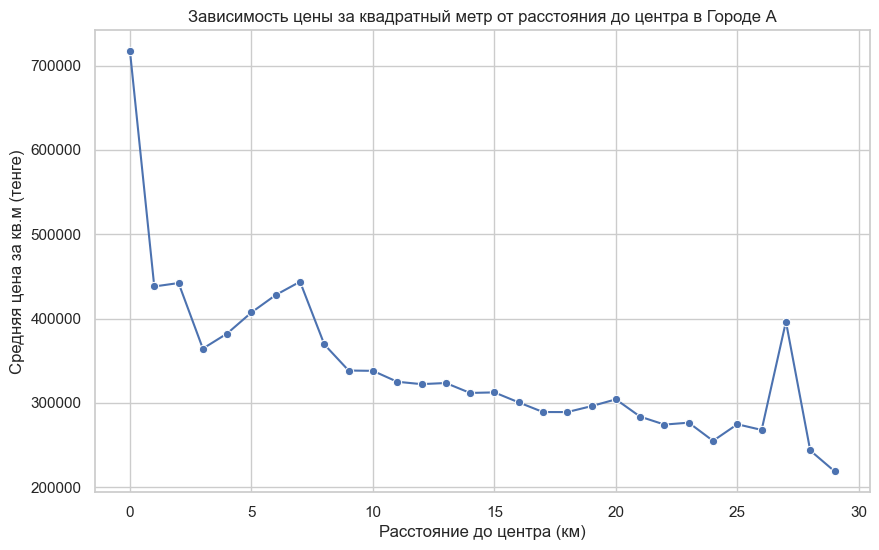

In [104]:
# Фильтруем только данные для города А
city_a_df = df[df['locality_name'] == 'Город А']

# Преобразуем расстояние до центра из метров в километры и округлим до целых чисел
city_a_df['distance_to_center_km'] = (city_a_df['cityCenters_nearest'] / 1000).round()

# Рассчитаем среднюю цену за квадратный метр для каждого километра
price_by_distance = city_a_df.groupby('distance_to_center_km')['price_per_sqm'].mean()

# Построим график зависимости цены от расстояния до центра
plt.figure(figsize=(10, 6))
sns.lineplot(x=price_by_distance.index, y=price_by_distance.values, marker='o', color='b')
plt.title('Зависимость цены за квадратный метр от расстояния до центра в Городе А')
plt.xlabel('Расстояние до центра (км)')
plt.ylabel('Средняя цена за кв.м (тенге)')
plt.grid(True)
plt.show()


In [105]:
# Создаем сводную таблицу: средняя цена за квадратный метр для каждого расстояния до центра
distance_price_summary = city_a_df.groupby('distance_to_center_km')['price_per_sqm'].agg(['mean', 'count'])

# Выводим результат
print(distance_price_summary)


                                mean  count
distance_to_center_km                      
0.0                    717018.734737     19
1.0                    438008.532013    159
2.0                    442094.829688    256
3.0                    364319.340994    312
4.0                    382237.380177    620
5.0                    407204.221886    806
6.0                    427923.490855    538
7.0                    443681.289202    376
8.0                    369249.222388    557
9.0                    338320.377736    583
10.0                   337950.249743    701
11.0                   325014.692916   1159
12.0                   322174.882463   1575
13.0                   323517.749431   1424
14.0                   311738.913526   1248
15.0                   312395.509552   1540
16.0                   300557.560193   1241
17.0                   289095.975023    864
18.0                   289047.710277    253
19.0                   296110.961871    155
20.0                   304141.73

1. **Цены выше вблизи центра:** Для ближайших к центру участков (0-2 км) средняя цена за квадратный метр значительно выше, чем для более удалённых (например, на 0 км цена — 717,018 тенге, на 2 км — 442,095 тенге).

2. **Цены постепенно снижаются:** С увеличением расстояния от центра, цена на квадратный метр в целом снижается, хотя наблюдаются колебания. Например, на 16-17 км цены падают до 289,095 тенге.

3. **Интересный пик на 7 км:** На 7 км наблюдается повышение средней цены до 443,681 тенге, что может указывать на определённую привлекательность или развитие инфраструктуры на этом расстоянии от центра.

4. **Цены на периферии:** На больших расстояниях от центра (25-29 км) средняя цена снижается до 218,860 тенге, что подтверждает снижение цен в удалённых районах.

Таким образом, центральная зона города, скорее всего, охватывает расстояние до 5-6 км, где цены наиболее высокие, а затем они начинают снижаться.

### 4.3.5. Анализ сегмента квартир в центре в городе А

Будем проводить анализ сегмента квартир в центре в городе А *(параллельно сравнивая с данными всего города)*
1. Выделим квартиры в центре (например, с расстоянием до центра до 5 км). Изучим статистику по ключевым параметрам (площадь, цена, число комнат, высота потолков). 
2. Проанализируем зависимость цены от факторов (число комнат, этаж, удалённость от центра, дата размещения). Сравним с общими выводами по всему городу.

#### Площадь, цена, число комнат, высота потолков (сегмента квартир в центре в городе А)

In [110]:
# Фильтруем данные для центральной части города (расстояние до центра <= 5 км)
city_center_df = city_a_df[city_a_df['distance_to_center_km'] <= 5]

In [111]:
# Статистика центра города
city_center_summary.describe()

NameError: name 'city_center_summary' is not defined

In [ ]:
# Список столбцов для построения гистограмм
columns = ['total_area', 'last_price_millions', 'rooms', 'ceiling_height']

# Настройка стиля seaborn для улучшенного отображения
sns.set(style="whitegrid")

# Создаем фигуру и оси для гистограмм
plt.figure(figsize=(15, 12))

# Строим гистограмму для каждого столбца
for i, col in enumerate(columns, 1):
    plt.subplot(2, 2, i)  # 2 строки и 2 столбца
    sns.histplot(city_center_df[col], kde=True, color='skyblue', bins=30, edgecolor='black')
    plt.title(f'Распределение: {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Частота', fontsize=12)

# Настройка общих параметров для всей фигуры
plt.tight_layout()
plt.show()

**Выводы:**
* Цены в центре города значительно выше, чем в целом по городу.
* В центре города чаще встречаются квартиры с большим количеством комнат.
* В центре города преобладают низкие этажи.
* Расстояние до центра в других районах города в среднем в 3 раза больше.

#### Зависимость цены от факторов (число комнат, этаж, удалённость от центра, дата размещения)

In [ ]:
# Определяем факторы для группировки
factors = ['rooms', 'floor', 'distance_to_center_km', 'publication_weekday', 'publication_month']

# Сводная таблица для центра города
city_center_summary = city_center_df.groupby(factors)['last_price_millions'].mean().reset_index()

# Сводная таблица для всего города
total_city_summary = city_a_df.groupby(factors)['last_price_millions'].mean().reset_index()

In [ ]:
# Корреляционная матрица для центральной части города
correlation_matrix_center = city_center_df[['last_price_millions', 'total_area', 'rooms', 'ceiling_height', 'floor', 'distance_to_center_km']].corr()
print("Корреляционная матрица для центральной части города:")
correlation_matrix_center

In [ ]:
# Корреляционная матрица для всего города
correlation_matrix_total_city = city_a_df[['last_price_millions', 'total_area', 'rooms', 'ceiling_height', 'floor', 'distance_to_center_km']].corr()
print("\nКорреляционная матрица для всего города:")
correlation_matrix_total_city

In [ ]:
# Настроим стиль графиков
sns.set(style='white', palette='muted')

# Создаем фигуру и подграфики (2 графика в одну линию)
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Создадим график для центральной части города
sns.heatmap(correlation_matrix_center, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, fmt=".2f", cbar_kws={'shrink': 0.8}, ax=axes[0])
axes[0].set_title('Корреляционная матрица для центральной части города')

# Создадим график для всего города
sns.heatmap(correlation_matrix_total_city, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, fmt=".2f", cbar_kws={'shrink': 0.8}, ax=axes[1])
axes[1].set_title('Корреляционная матрица для всего города')

# Показать графики
plt.tight_layout()  # Автоматически подогнать элементы на графиках
plt.show()

**Выводы:**
* Цена и площадь имеют более сильную корреляцию по всему городу, чем в центре города.
* В центре города количество комнат имеет слабую зависимость от цены, в отличие от более сильной корреляции по всему городу.
* Этаж не оказывает существенного влияния на цену или площадь в центре города.
* Высота потолков слабо влияет на цену или площадь, но имеет заметное влияние на весь город в контексте более старых и высоких зданий, расположенных в центральных районах.
* Расстояние до центра имеет более выраженную отрицательную корреляцию с ценой по всему городу, чем в центре.

In [ ]:
# Сравнение средней цены по дням недели и месяцам для всего города и центра
plt.figure(figsize=(12, 6))

# Для всего города
sns.lineplot(x='publication_weekday', y='last_price_millions', data=total_city_summary, label='Весь город', marker='o')

# Для центра города
sns.lineplot(x='publication_weekday', y='last_price_millions', data=city_center_summary, label='Центр города', marker='o')

plt.title('Зависимость цены от дня недели')
plt.xlabel('День недели')
plt.ylabel('Цена (млн. тенге)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

**Выводы:**
* Цены в центре города значительно выше и более подвержены колебаниям по дням недели.
* Во всём городе цены стабильнее, но сохраняются на гораздо более низком уровне.
* Самые высокие цены, вероятно, связаны с активностью покупателей или публикацией более дорогих предложений в четверг и понедельник.

# Шаг 5. Заключительный вывод

Для создания автоматизированной системы оценки недвижимости и выявления аномалий необходимо учитывать следующие особенности:

1. **Цены и факторы влияния:**
* В центре города: высокие цены, слабая зависимость от количества комнат и площади, значительная волатильность по дням недели.
* В целом по городу: цена тесно связана с площадью, количеством комнат и расстоянием до центра.

2. **Аномалии и риски:**
* Несоответствие цены и площади.
* Нетипичные комбинации этажности и стоимости.
* Публикации в нехарактерные дни с подозрительно высокими/низкими ценами.

3. **Особенности рынка:**
* Центр города менее предсказуем, поэтому важен анализ колебаний цен и спроса.
* В остальных районах рынок стабильнее, с более выраженными зависимостями.

**Итог**
* Система должна адаптироваться к различиям между центральными и периферийными районами, выявляя аномальные значения и предотвращая мошенничество на основе ключевых параметров: **цены, площади, количества комнат и расстояния до центра.**